In [2]:
import pandas as pd
import numpy as np
import statistics

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_curve,precision_recall_curve

import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing of Data

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
label_enc = LabelEncoder()

# Taking out Labels
data.drop('Loan_ID',inplace=True,axis=1)
labels = data.Loan_Status
labels = label_enc.fit_transform(labels)
data.drop('Loan_Status',inplace=True,axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [8]:
# Description of Data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
print('Shape of Data :: ',data.shape)

Shape of Data ::  (614, 11)


In [10]:
# Extracting different feature names of different dtypes

object_cols = []
int_cols = []
float_cols=[]
for col in data.columns:
    if data[col].dtype == 'object':
        object_cols.append(col)
    elif data[col].dtype == 'int64' :
        int_cols.append(col)
    elif data[col].dtype =='float64':
        float_cols.append(col)

In [11]:
# Imputing NaN values
for col in object_cols:
    data[col].fillna(statistics.mode(data[col]),inplace = True)
    data[col] = label_enc.fit_transform(data[col])
    
for col in int_cols:
    data[col].fillna(int(statistics.mean(data[col])),inplace = True)
                
for col in float_cols:
    data[col].fillna(data[col].mean(),inplace = True)

In [12]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [17]:
# scaling data in Range [0,1]
scaler = MinMaxScaler()
data.ApplicantIncome = scaler.fit_transform(np.array(data.ApplicantIncome).reshape(-1,1))
data.CoapplicantIncome = scaler.fit_transform(np.array(data.CoapplicantIncome).reshape(-1,1))
data.LoanAmount = scaler.fit_transform(np.array(data.LoanAmount).reshape(-1,1))
data.Loan_Amount_Term = scaler.fit_transform(np.array(data.Loan_Amount_Term).reshape(-1,1))

In [18]:
# Splitting Data in train and test
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,stratify=labels,random_state=42,shuffle=True)

In [1]:
X_train

NameError: name 'X_train' is not defined

# Plots and metrics

In [19]:
def plot_ConfusionMatrix(Y_true,Y_pred):
    plt.title('Confusion Matirx')
    conf_matrix = confusion_matrix(Y_true,Y_pred)
    sns.heatmap(conf_matrix,annot=True,xticklabels=['N', 'Y'],yticklabels=['N', 'Y'],fmt='.5g')


def scores(Y_true,Y_pred):
    accuracy = accuracy_score(Y_true,Y_pred)
    print("Accuracy  :: {}".format("%.2f" %accuracy))
    
    precision = precision_score(Y_true,Y_pred)
    print("Precision :: {}".format("%.2f" %precision))
    
    recall = recall_score(Y_true,Y_pred)
    print("Recall    :: {}".format("%.2f" %recall))
    
    tn, fp, fn, tp = confusion_matrix(Y_true, Y_pred).ravel()
    specificity = tn / (tn+fp)
    print("Specificity :: {}".format("%.2f" %specificity))
    
    fscore = f1_score(Y_true,Y_pred)
    print("F1score   :: {}".format("%.2f" %fscore))


In [20]:
# Y_pred is the probability of classes and curves depicts positive class
def curves(Y_true,Y_pred):
    plt.figure(figsize=(11,5))
    plt.subplot(121)
    
    #ROC CURVE
    false_pr,true_pr,_ = roc_curve(Y_true,Y_pred[:,1])
    plt.title('ROC (Receiver Operating Characteristics) curve')
    plt.plot([0,1],[0,1],'--')
    plt.plot(false_pr,true_pr,'.-',label='Roc_curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    
    plt.subplot(122)
    
    # PR CURVE
    plt.title('Precision-Recall Curve')
    precision, recall, _ = precision_recall_curve(Y_true,Y_pred[:,1])
    plt.plot(recall,precision,'.-',label='PR CURVE')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    #PR v/s ROC CURVE 
    plt.title('PR v/s ROC CURVE ')
    plt.plot(false_pr,true_pr,'.-',label='Roc_curve')
    plt.plot(recall,precision,'.-',label='PR CURVE')
    plt.legend()
    plt.show()

# Models

#### SVM RBF

In [21]:
svm_rbf = SVC(probability = True)
svm_rbf.fit(X_train,Y_train)
Y_pred = svm_rbf.predict(X_test)
Y_predProb = svm_rbf.predict_proba(X_test)

Accuracy  :: 0.86
Precision :: 0.83
Recall    :: 0.99
Specificity :: 0.56
F1score   :: 0.91


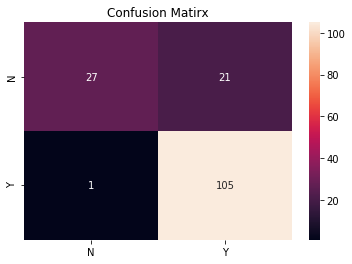

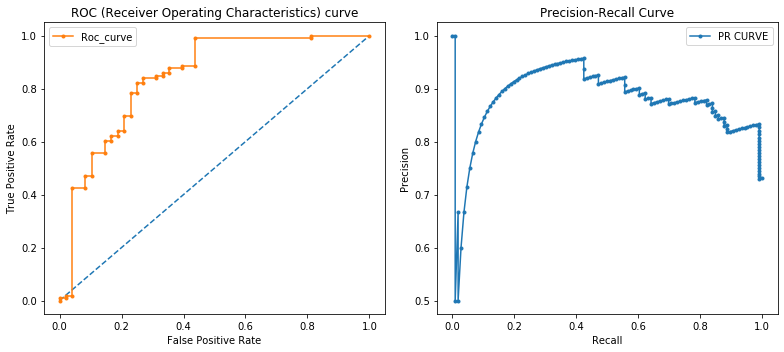

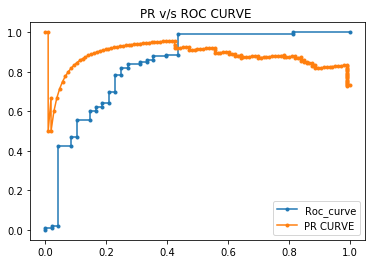

In [22]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Linear svm

In [23]:
svm_lin = SVC(kernel='linear',probability=True)
svm_lin.fit(X_train,Y_train)
Y_pred = svm_lin.predict(X_test)
Y_predProb = svm_lin.predict_proba(X_test)

Accuracy  :: 0.86
Precision :: 0.83
Recall    :: 0.99
Specificity :: 0.56
F1score   :: 0.91


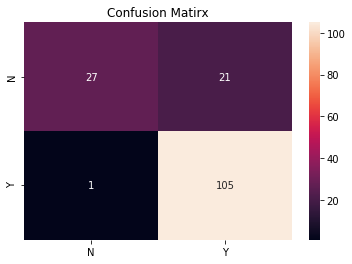

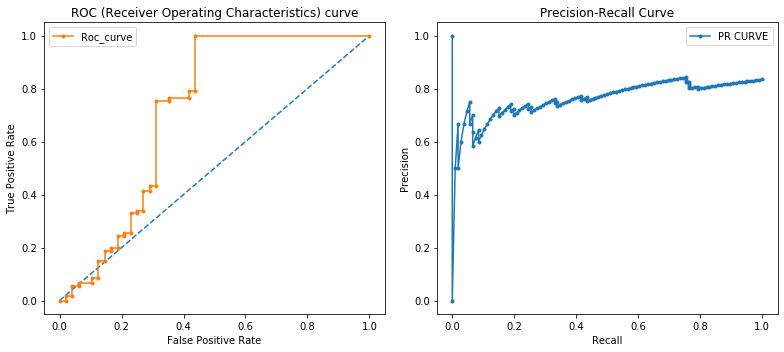

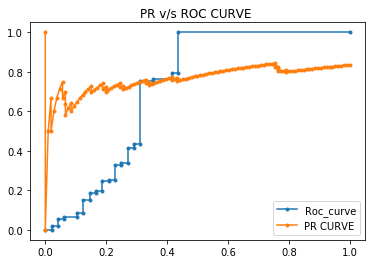

In [24]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Polynomial SVM

In [25]:
svm_poly = SVC(kernel='poly',probability=True)
svm_poly.fit(X_train,Y_train)
Y_pred = svm_poly.predict(X_test)
Y_predProb = svm_poly.predict_proba(X_test)

Accuracy  :: 0.85
Precision :: 0.83
Recall    :: 0.99
Specificity :: 0.54
F1score   :: 0.90


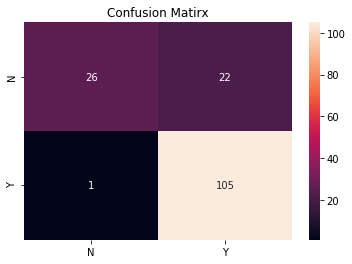

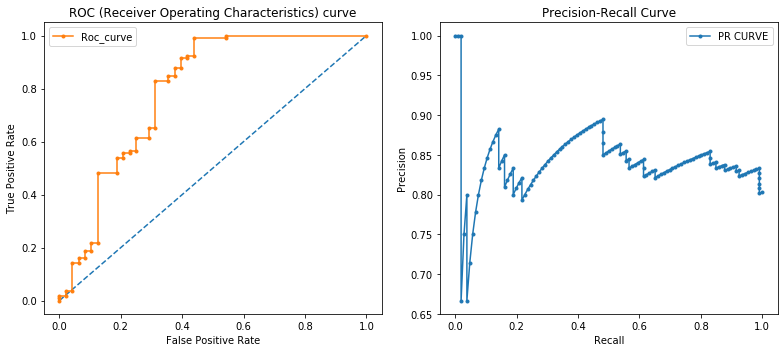

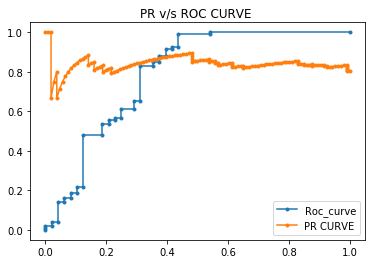

In [26]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Sigmoid SVM

In [27]:
svm_sig = SVC(kernel='sigmoid',probability=True)
svm_sig.fit(X_train,Y_train)
Y_pred = svm_sig.predict(X_test)
Y_predProb = svm_sig.predict_proba(X_test)

Accuracy  :: 0.58
Precision :: 0.67
Recall    :: 0.77
Specificity :: 0.17
F1score   :: 0.72


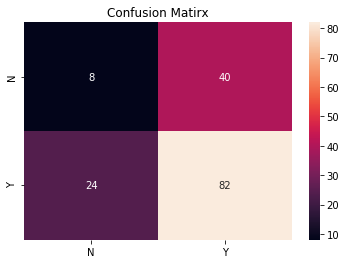

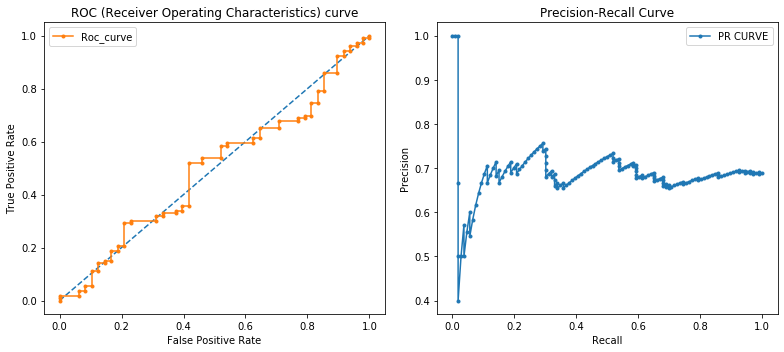

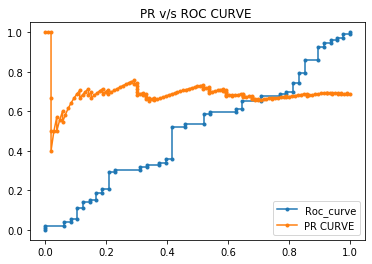

In [28]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### GAUSSIAN RBF

In [29]:
svm_gauss = SVC(kernel = 'rbf',gamma='auto',probability=True)
svm_gauss.fit(X_train,Y_train)
Y_pred = svm_gauss.predict(X_test)
Y_predProb = svm_gauss.predict_proba(X_test)

Accuracy  :: 0.86
Precision :: 0.83
Recall    :: 0.99
Specificity :: 0.56
F1score   :: 0.91


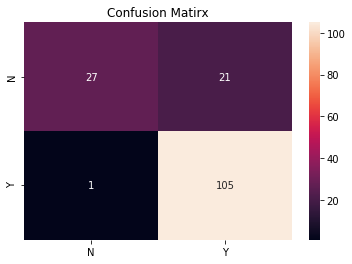

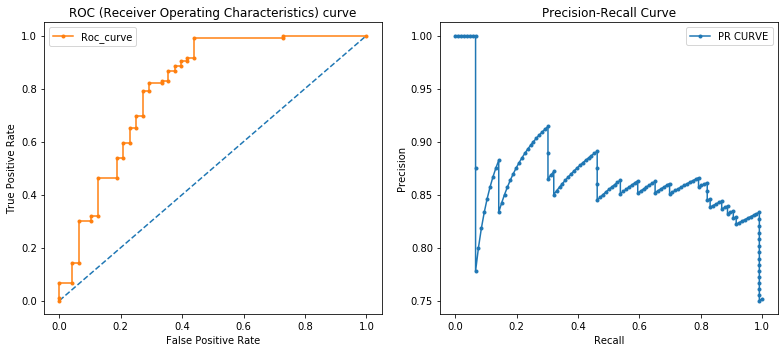

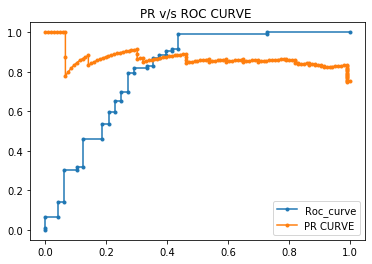

In [30]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Cosine similarity 

In [32]:
from pykernels.regular import Cossim

svm_cos = SVC(kernel = Cossim(),probability=True)
svm_cos.fit(X_train,Y_train)
Y_pred = svm_cos.predict(X_test)
Y_predProb = svm_cos.predict_proba(X_test)

Accuracy  :: 0.86
Precision :: 0.83
Recall    :: 0.99
Specificity :: 0.56
F1score   :: 0.91


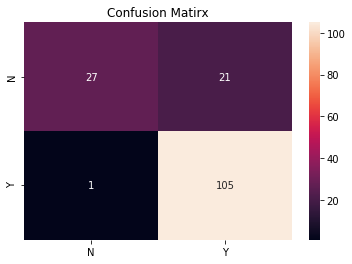

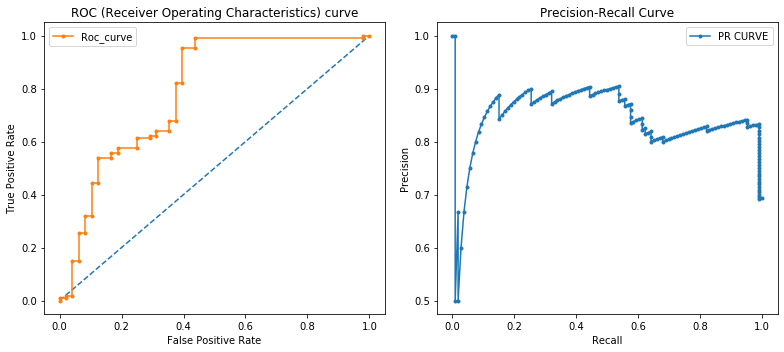

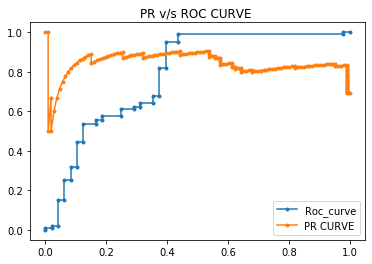

In [33]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Exponential SVM

In [34]:
from pykernels.regular import Exponential

svm_exp = SVC(kernel = Exponential(),probability=True)
svm_exp.fit(X_train,Y_train)
Y_pred = svm_exp.predict(X_test)
Y_predProb = svm_exp.predict_proba(X_test)

Accuracy  :: 0.86
Precision :: 0.83
Recall    :: 0.99
Specificity :: 0.56
F1score   :: 0.91


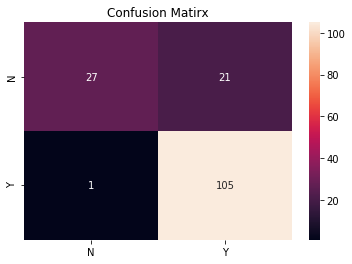

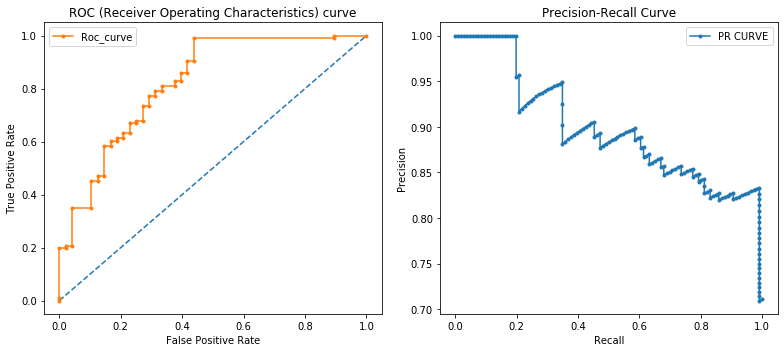

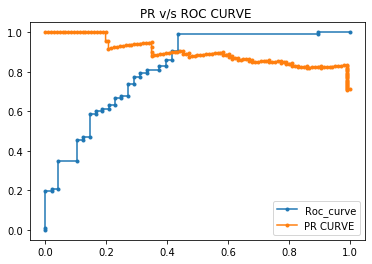

In [35]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Laplacian SVM

In [36]:
from pykernels.regular import Laplacian

svm_lap = SVC(kernel = Laplacian(),probability=True)
svm_lap.fit(X_train,Y_train)
Y_pred = svm_lap.predict(X_test)
Y_predProb = svm_lap.predict_proba(X_test)

Accuracy  :: 0.86
Precision :: 0.83
Recall    :: 0.99
Specificity :: 0.56
F1score   :: 0.91


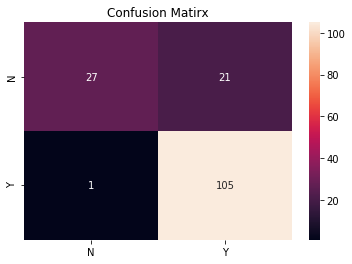

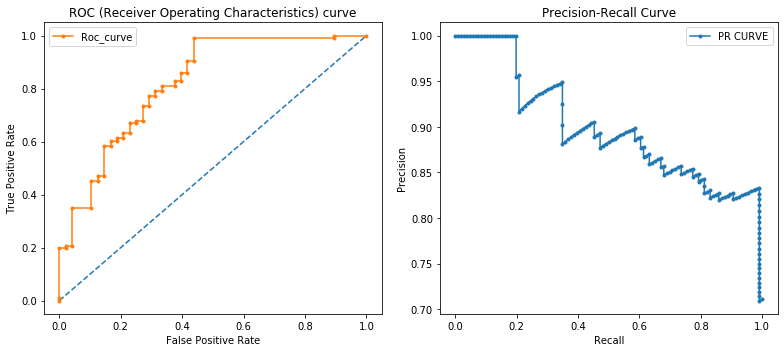

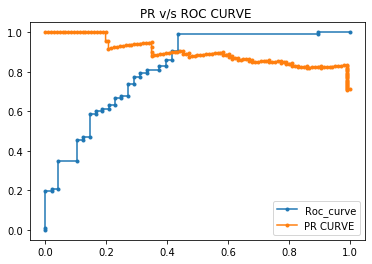

In [37]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### RationalQuadratic SVM

In [49]:
from pykernels.regular import RationalQuadratic

svm_rquad = SVC(kernel = RationalQuadratic(),probability=True)
svm_rquad.fit(X_train,Y_train)
Y_pred = svm_rquad.predict(X_test)
Y_predProb = svm_rquad.predict_proba(X_test)

Accuracy  :: 0.86
Precision :: 0.83
Recall    :: 0.99
Specificity :: 0.56
F1score   :: 0.91


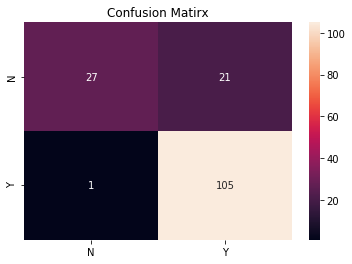

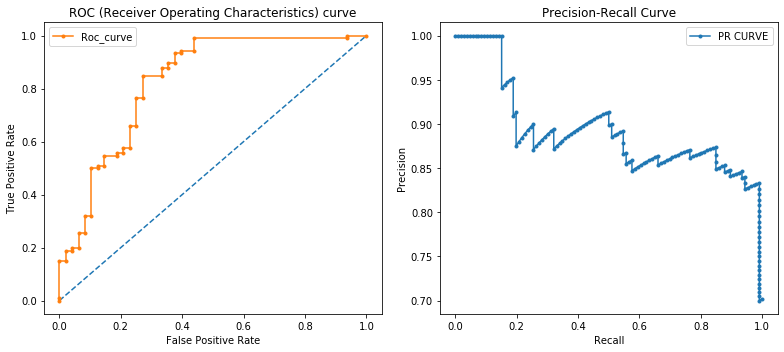

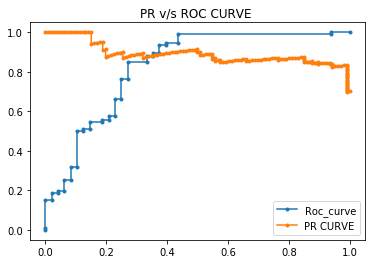

In [50]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Inverse multiquadratic

In [55]:
from pykernels.regular import InverseMultiquadratic

svm_mul = SVC(kernel = InverseMultiquadratic(),probability=True)
svm_mul.fit(X_train,Y_train)
Y_pred = svm_mul.predict(X_test)
Y_predProb = svm_mul.predict_proba(X_test)

Accuracy  :: 0.86
Precision :: 0.83
Recall    :: 0.99
Specificity :: 0.56
F1score   :: 0.91


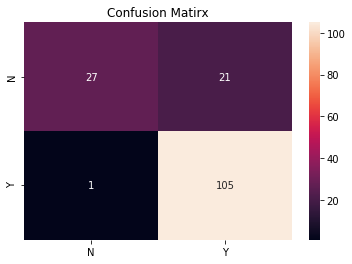

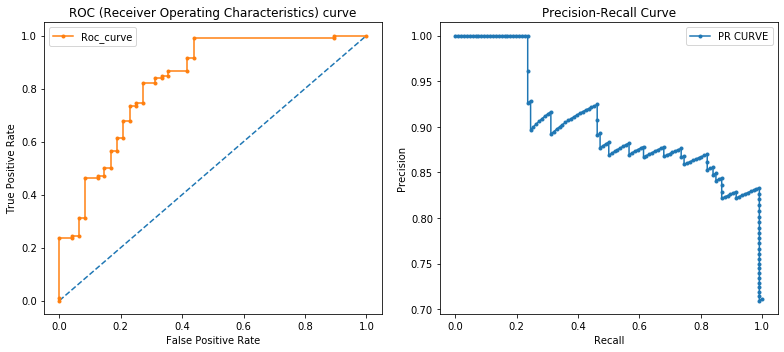

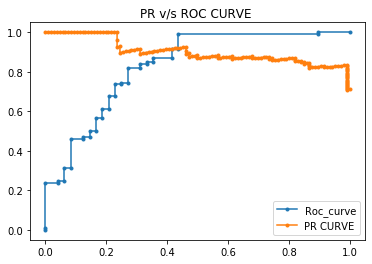

In [56]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Cauchy

In [57]:
from pykernels.regular import Cauchy

svm_cau = SVC(kernel = Cauchy(),probability=True)
svm_cau.fit(X_train,Y_train)
Y_pred = svm_cau.predict(X_test)
Y_predProb = svm_cau.predict_proba(X_test)

Accuracy  :: 0.86
Precision :: 0.83
Recall    :: 0.99
Specificity :: 0.56
F1score   :: 0.91


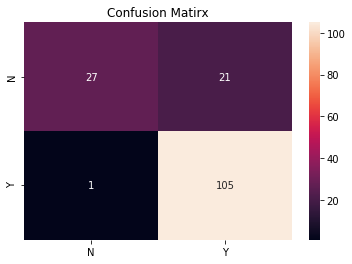

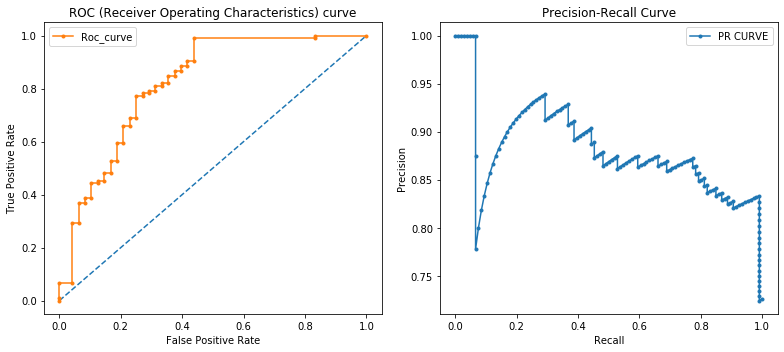

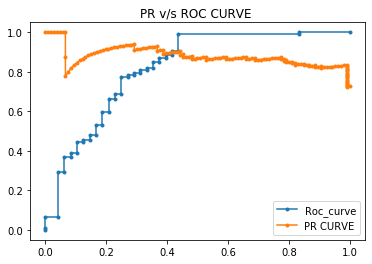

In [58]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### TStudent SVM

In [60]:
from pykernels.regular import TStudent

svm_tst = SVC(kernel = TStudent(),probability=True)
svm_tst.fit(X_train,Y_train)
Y_pred = svm_tst.predict(X_test)
Y_predProb = svm_tst.predict_proba(X_test)

Accuracy  :: 0.86
Precision :: 0.83
Recall    :: 0.99
Specificity :: 0.56
F1score   :: 0.91


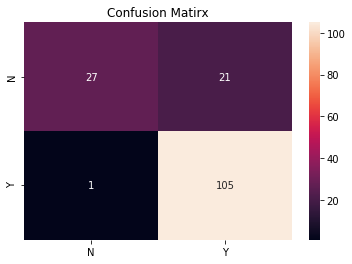

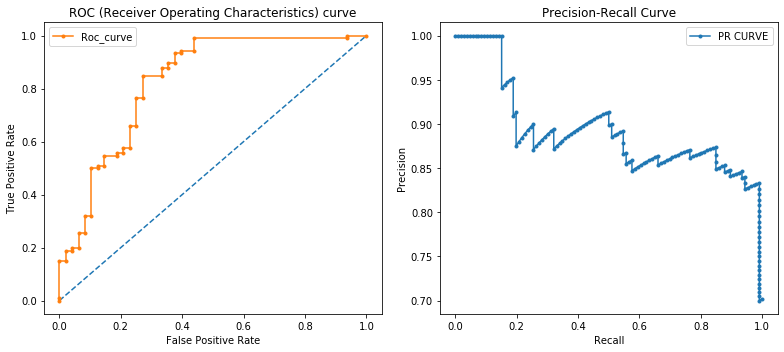

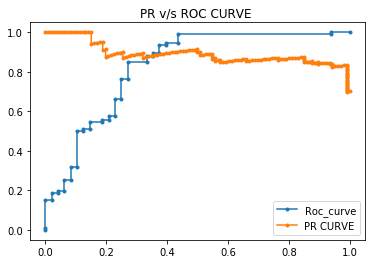

In [61]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### ANOVA

In [62]:
from pykernels.regular import ANOVA

svm_anova = SVC(kernel = ANOVA(),probability=True)
svm_anova.fit(X_train,Y_train)
Y_pred = svm_anova.predict(X_test)
Y_predProb = svm_anova.predict_proba(X_test)

Accuracy  :: 0.86
Precision :: 0.83
Recall    :: 0.99
Specificity :: 0.56
F1score   :: 0.91


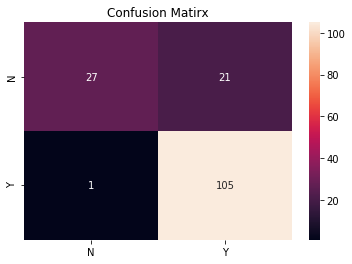

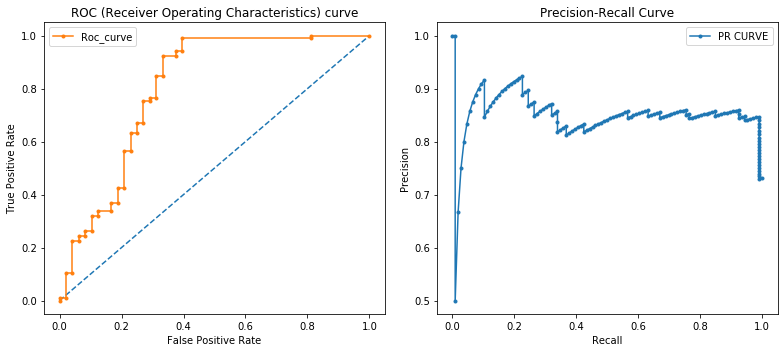

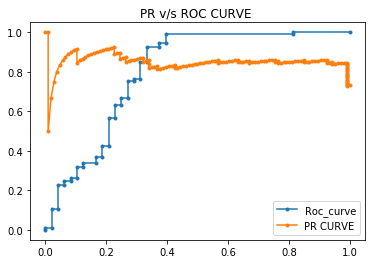

In [63]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Wavelet SVM

In [64]:
from pykernels.regular import Wavelet

svm_wave = SVC(kernel = Wavelet(),probability=True)
svm_wave.fit(X_train,Y_train)
Y_pred = svm_wave.predict(X_test)
Y_predProb = svm_wave.predict_proba(X_test)

Accuracy  :: 0.77
Precision :: 0.76
Recall    :: 0.97
Specificity :: 0.33
F1score   :: 0.85


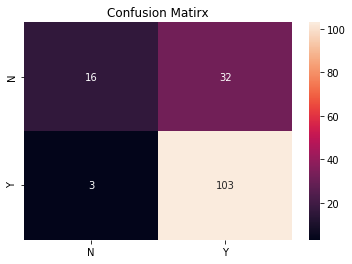

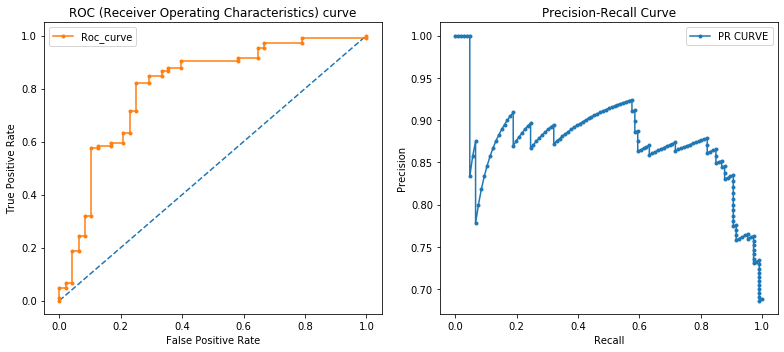

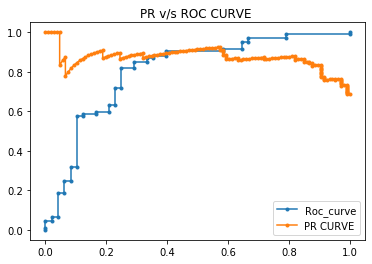

In [65]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Fourier SVM

In [66]:
from pykernels.regular import Fourier

svm_fou = SVC(kernel = Fourier(),probability=True)
svm_fou.fit(X_train,Y_train)
Y_pred = svm_fou.predict(X_test)
Y_predProb = svm_fou.predict_proba(X_test)

Accuracy  :: 0.69
Precision :: 0.69
Recall    :: 1.00
Specificity :: 0.00
F1score   :: 0.82


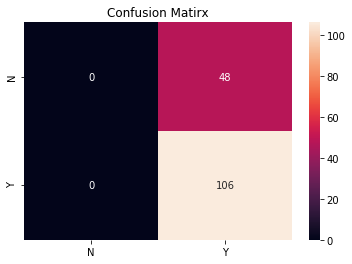

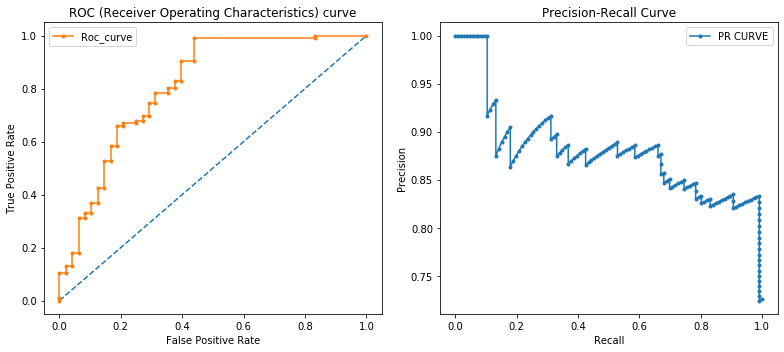

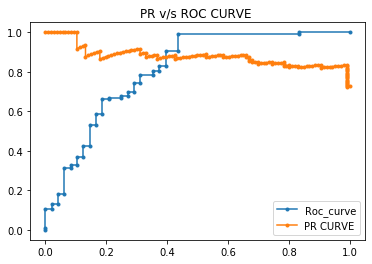

In [67]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Tanimoto SVM

In [68]:
from pykernels.regular import Tanimoto

svm_tani = SVC(kernel = Tanimoto(),probability=True)
svm_tani.fit(X_train,Y_train)
Y_pred = svm_tani.predict(X_test)
Y_predProb = svm_tani.predict_proba(X_test)

Accuracy  :: 0.86
Precision :: 0.83
Recall    :: 0.99
Specificity :: 0.56
F1score   :: 0.91


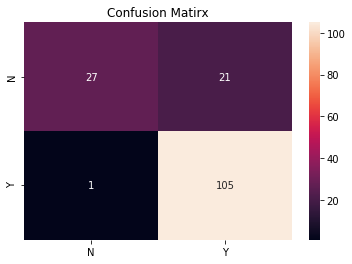

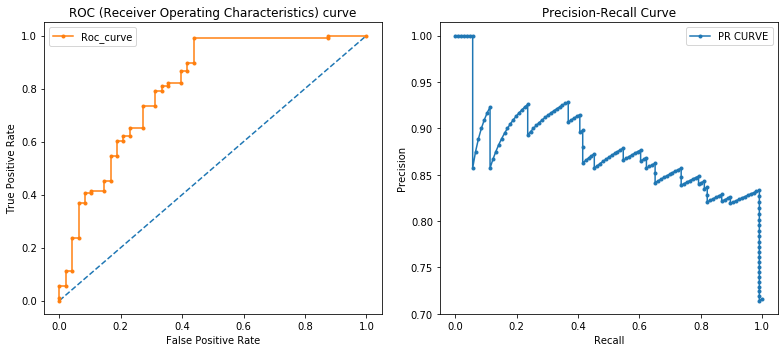

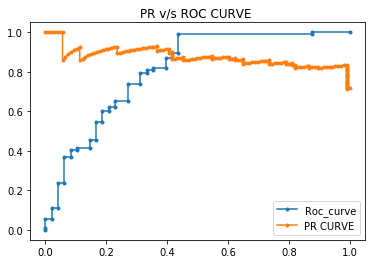

In [69]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Sorensen SVM

In [70]:
from pykernels.regular import Sorensen

svm_sor = SVC(kernel = Sorensen(),probability=True)
svm_sor.fit(X_train,Y_train)
Y_pred = svm_sor.predict(X_test)
Y_predProb = svm_sor.predict_proba(X_test)

Accuracy  :: 0.86
Precision :: 0.83
Recall    :: 0.99
Specificity :: 0.56
F1score   :: 0.91


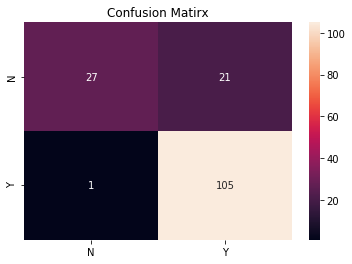

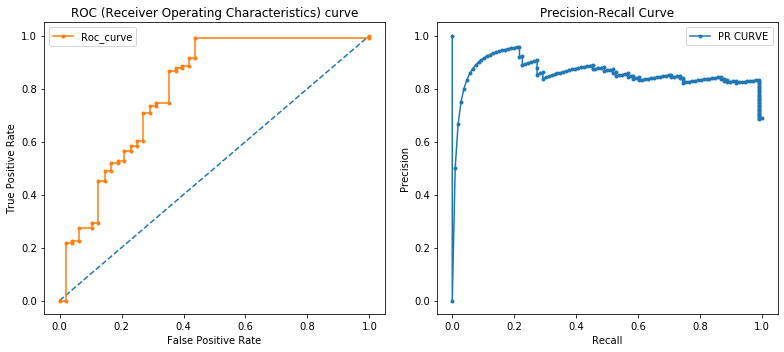

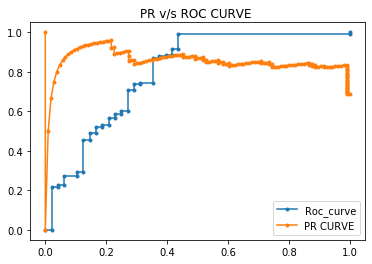

In [71]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Additive Chi^2 kernel SVM

In [73]:
from pykernels.regular import AdditiveChi2

svm_pos = SVC(kernel = AdditiveChi2(),probability=True)
svm_pos.fit(X_train,Y_train)
Y_pred = svm_pos.predict(X_test)
Y_predProb = svm_pos.predict_proba(X_test)

C:\Users\soura\Anaconda3\lib\site-packages\pykernels\regular.py:361: RuntimeWarning: invalid value encountered in true_divide
  kernel += 2 * (column_1 * column_2.T) / (column_1 + column_2.T)
C:\Users\soura\Anaconda3\lib\site-packages\pykernels\regular.py:361: RuntimeWarning: invalid value encountered in true_divide
  kernel += 2 * (column_1 * column_2.T) / (column_1 + column_2.T)
C:\Users\soura\Anaconda3\lib\site-packages\pykernels\regular.py:361: RuntimeWarning: invalid value encountered in true_divide
  kernel += 2 * (column_1 * column_2.T) / (column_1 + column_2.T)


Accuracy  :: 0.69
Precision :: 0.69
Recall    :: 1.00
Specificity :: 0.00
F1score   :: 0.82


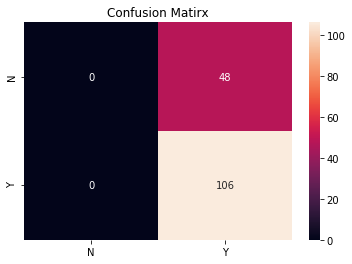

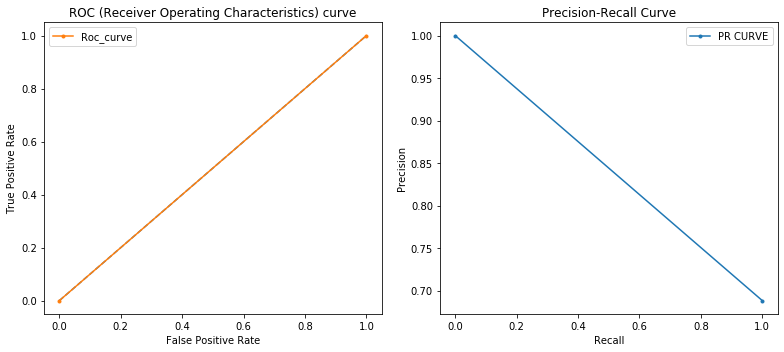

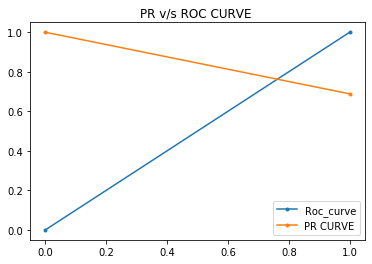

In [74]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Chi^2 kernel

In [75]:
from pykernels.regular import Chi2

svm_chi = SVC(kernel = AdditiveChi2(),probability=True)
svm_chi.fit(X_train,Y_train)
Y_pred = svm_chi.predict(X_test)
Y_predProb = svm_chi.predict_proba(X_test)

C:\Users\soura\Anaconda3\lib\site-packages\pykernels\regular.py:361: RuntimeWarning: invalid value encountered in true_divide
  kernel += 2 * (column_1 * column_2.T) / (column_1 + column_2.T)
C:\Users\soura\Anaconda3\lib\site-packages\pykernels\regular.py:361: RuntimeWarning: invalid value encountered in true_divide
  kernel += 2 * (column_1 * column_2.T) / (column_1 + column_2.T)
C:\Users\soura\Anaconda3\lib\site-packages\pykernels\regular.py:361: RuntimeWarning: invalid value encountered in true_divide
  kernel += 2 * (column_1 * column_2.T) / (column_1 + column_2.T)


Accuracy  :: 0.69
Precision :: 0.69
Recall    :: 1.00
Specificity :: 0.00
F1score   :: 0.82


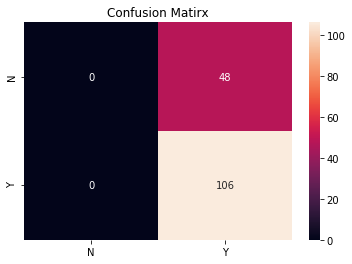

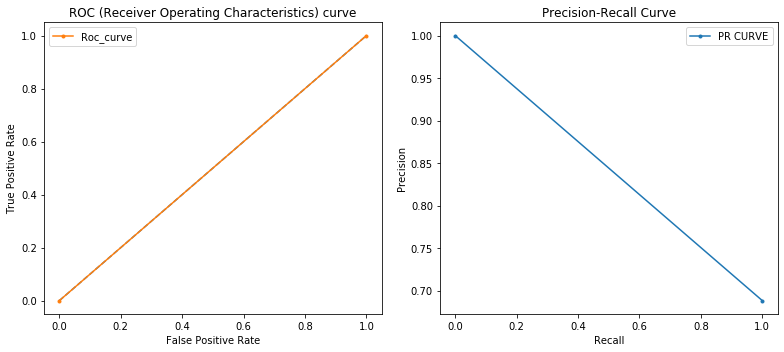

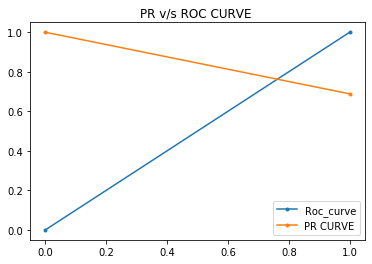

In [76]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Min kernel 

In [77]:
from pykernels.regular import Min

svm_min = SVC(kernel = Min(),probability=True)
svm_min.fit(X_train,Y_train)
Y_pred = svm_min.predict(X_test)
Y_predProb = svm_min.predict_proba(X_test)

Accuracy  :: 0.86
Precision :: 0.83
Recall    :: 0.99
Specificity :: 0.56
F1score   :: 0.91


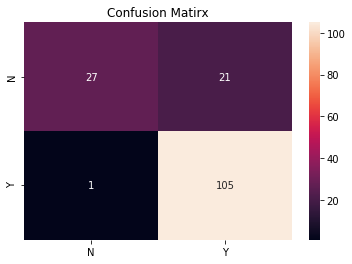

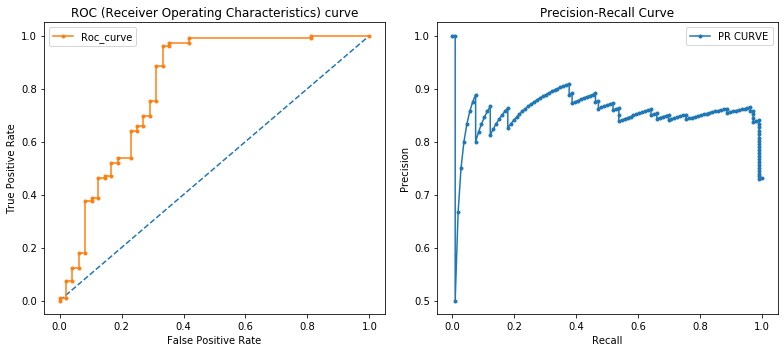

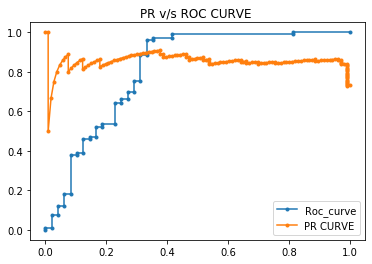

In [78]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

####  Generalized histogram intersection kernel

In [79]:
from pykernels.regular import GeneralizedHistogramIntersection

svm_hist = SVC(kernel = GeneralizedHistogramIntersection(),probability=True)
svm_hist.fit(X_train,Y_train)
Y_pred = svm_hist.predict(X_test)
Y_predProb = svm_hist.predict_proba(X_test)

Accuracy  :: 0.86
Precision :: 0.83
Recall    :: 0.99
Specificity :: 0.56
F1score   :: 0.91


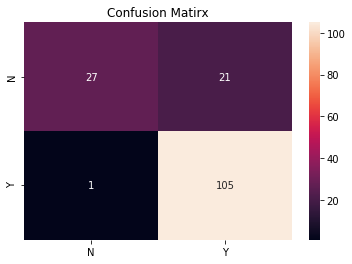

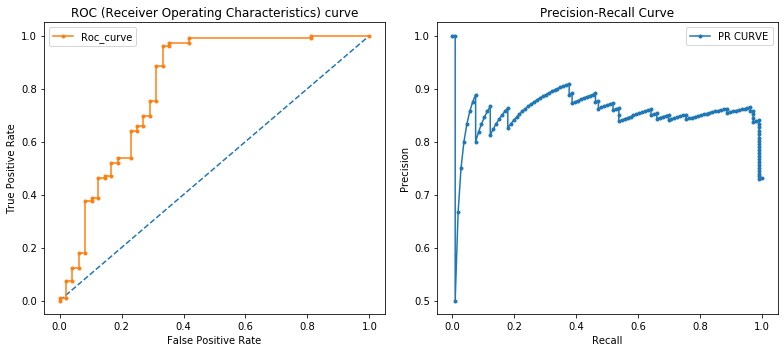

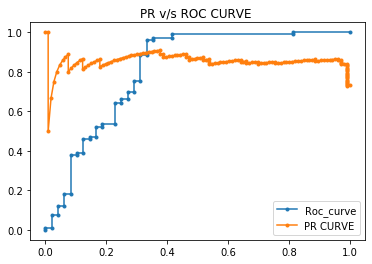

In [80]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### MinMax kernel

In [81]:
from pykernels.regular import MinMax

svm_minMax= SVC(kernel = MinMax(),probability=True)
svm_minMax.fit(X_train,Y_train)
Y_pred = svm_minMax.predict(X_test)
Y_predProb = svm_minMax.predict_proba(X_test)

Accuracy  :: 0.86
Precision :: 0.83
Recall    :: 0.99
Specificity :: 0.56
F1score   :: 0.91


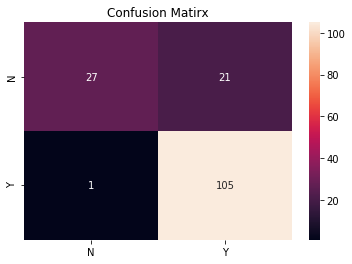

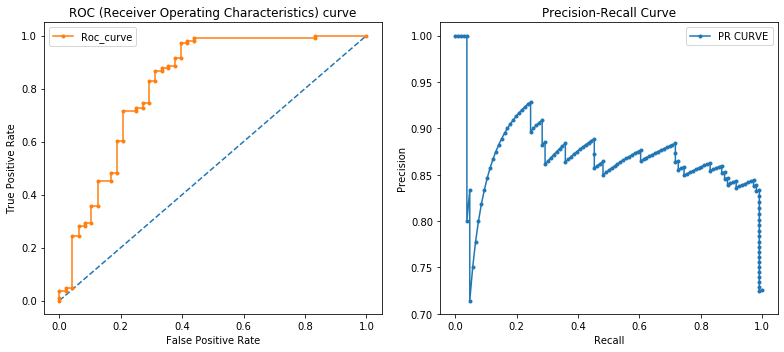

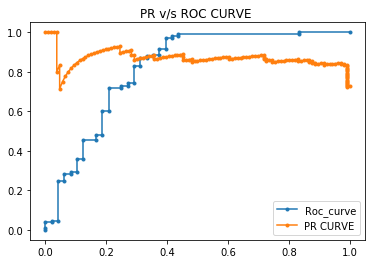

In [82]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Spline kernel

In [83]:
from pykernels.regular import Spline

svm_spline= SVC(kernel = Spline(),probability=True)
svm_spline.fit(X_train,Y_train)
Y_pred = svm_spline.predict(X_test)
Y_predProb = svm_spline.predict_proba(X_test)

Accuracy  :: 0.81
Precision :: 0.81
Recall    :: 0.94
Specificity :: 0.50
F1score   :: 0.87


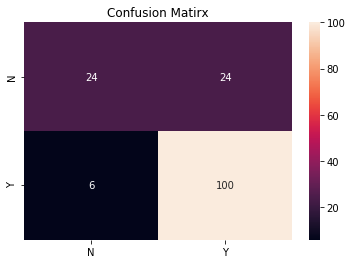

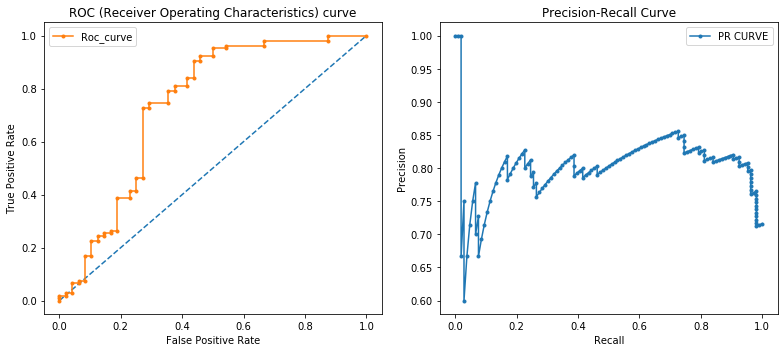

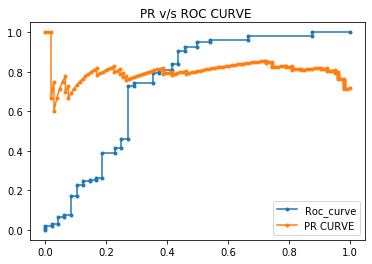

In [84]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Log Kernel

In [85]:
from pykernels.regular import Log

svm_log= SVC(kernel = Log(),probability=True)
svm_log.fit(X_train,Y_train)
Y_pred = svm_log.predict(X_test)
Y_predProb = svm_log.predict_proba(X_test)

Accuracy  :: 0.82
Precision :: 0.85
Recall    :: 0.91
Specificity :: 0.65
F1score   :: 0.88


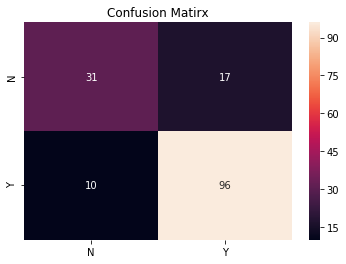

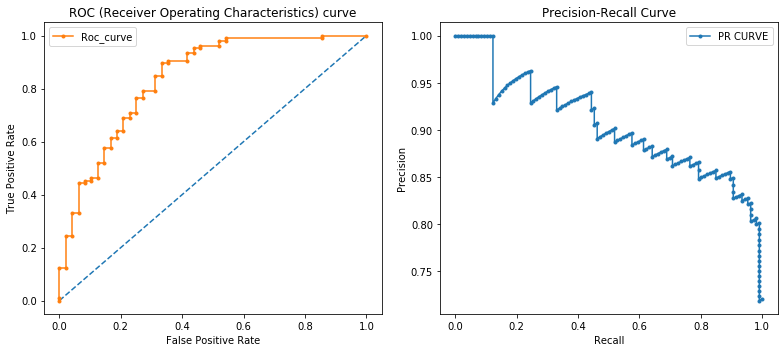

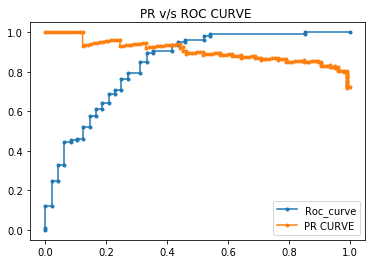

In [86]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)

#### Power kernel

In [87]:
from pykernels.regular import Power

svm_pow= SVC(kernel = Power(),probability=True)
svm_pow.fit(X_train,Y_train)
Y_pred = svm_pow.predict(X_test)
Y_predProb = svm_pow.predict_proba(X_test)

Accuracy  :: 0.61
Precision :: 0.73
Recall    :: 0.69
Specificity :: 0.44
F1score   :: 0.71


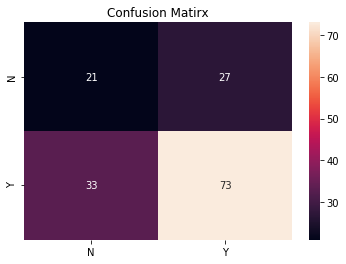

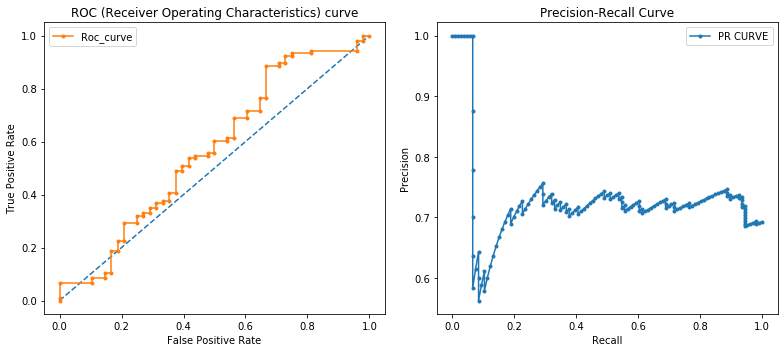

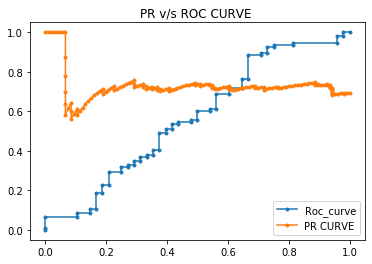

In [88]:
scores(Y_test,Y_pred)
plot_ConfusionMatrix(Y_test,Y_pred)
curves(Y_test,Y_predProb)